# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import time
import datetime
import random
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows

60

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [3]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
tweet_images_raw = url.split('/')[-1]

with open(os.path.join(tweet_images_raw), mode='wb') as file:
    file.write(response.content)

In [6]:
ls *.tsv

 Volume in drive C has no label.
 Volume Serial Number is E09A-909F

 Directory of c:\Users\aayus\OneDrive\Desktop\Nano Track\Data Analysis\wd\weRateDogs

01-10-2024  10:18           335,079 image-predictions.tsv
               1 File(s)        335,079 bytes
               0 Dir(s)  165,636,603,904 bytes free


In [7]:
tweet_images = pd.read_csv(tweet_images_raw, sep='\\t')
tweet_images.head()

C:\Users\aayus\AppData\Local\Temp\ipykernel_14616\303760158.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tweet_images = pd.read_csv(tweet_images_raw, sep='\\t')


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
tweet_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [9]:
consumer_key = 'CONSUMER KEY'
consumer_secret = 'CONSUMER SECRET'
access_token = 'ACCESS TOKEN'
access_secret = 'ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [10]:
# Get a list of tweet_ids from the enhanced twitter archive to use for 
# downloading with the Twitter API

tweet_ids = twitter_archive.tweet_id.values
print("# of tweet_ids: " + str(len(tweet_ids)) + "\n")

count = 0
tweet_json_list = []
fails_dict = {}

start_time = time.time()

for tweet_id in tweet_ids:
    count += 1
    try:
        # attempt to get the tweet's JSON data and append to the tweet JSON list
        tweet = api.get_status(tweet_id, tweet_mode = 'extended')
        tweet_json_list.append(tweet._json)
    except tweepy.errors.TweepyException as err:
        # save the error to the fail dictionary for review
        print("TweepError for id:  " + str(tweet_id))
        fails_dict[tweet_id] = err
        pass
    # To save space, only print out loop/tweet id for every 100th tweet
    if count % 100 == 0:
        print("loop # " + str(count))

elapsed_time = time.time() - start_time

elapsed_time_str = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
print("\nTime elapsed (HH:MM:SS):  " + elapsed_time_str + "\n")

# display list of tweets with errors
print("Number of TweepErrors:  {}\n".format(len(fails_dict)))
for tweet_id in fails_dict:
    print(tweet_id, fails_dict[tweet_id])

# of tweet_ids: 2356

TweepError for id:  892420643555336193
TweepError for id:  892177421306343426
TweepError for id:  891815181378084864
TweepError for id:  891689557279858688
TweepError for id:  891327558926688256
TweepError for id:  891087950875897856
TweepError for id:  890971913173991426
TweepError for id:  890729181411237888
TweepError for id:  890609185150312448
TweepError for id:  890240255349198849
TweepError for id:  890006608113172480
TweepError for id:  889880896479866881
TweepError for id:  889665388333682689
TweepError for id:  889638837579907072
TweepError for id:  889531135344209921
TweepError for id:  889278841981685760
TweepError for id:  888917238123831296
TweepError for id:  888804989199671297
TweepError for id:  888554962724278272
TweepError for id:  888202515573088257
TweepError for id:  888078434458587136
TweepError for id:  887705289381826560
TweepError for id:  887517139158093824
TweepError for id:  887473957103951883
TweepError for id:  887343217045368832
Twe

In [9]:
# As we weren't able to access any tweet through the Tweepy API, we use the resource available on Udacity for the JSON output. 

df_list = []
with open('tweet-json copy', mode='r', encoding='utf-8') as file:
    lines = file.readlines()
    # read tweet JSON data line by line
    for line in lines:
        data = json.loads(line)
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        df_list.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count})
tweet_data = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

In [10]:
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [11]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual Assessment

In [12]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN


Quality: Many dog names are NaN or 'a', which needs to be corrected.

Tidyness: The stages of a dog (doggo, floofer, pupper, puppo) should be one single column. 

In [13]:
tweet_images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


Quality: The prediction column lacks capitalization consistency. 

Tidyness: The predictions are spread over multiple columns. There should be one column for the prediction number, prediction, confidence, and whether the prediciton is a type of dog breed. 

In [14]:
tweet_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


### Programmatic Assessment

#### twitter_archive

In [15]:
# Checking duplicates in twitter_archive df.

sum(twitter_archive.duplicated())

0

In [16]:
sum(twitter_archive['tweet_id'].duplicated())

0

In [17]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

timestamp should have the datetime data type, and the dog stage should be a categorical data type.

#### tweet_images

In [18]:
tweet_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
#checking for duplicates

sum(tweet_images.duplicated('tweet_id'))

0

In [20]:
sum(tweet_images.duplicated('jpg_url'))

66

In [21]:
duplicated_images = tweet_images[tweet_images.duplicated('jpg_url')]['tweet_id']
duplicated_images.head()

1297    752309394570878976
1315    754874841593970688
1333    757729163776290825
1345    759159934323924993
1349    759566828574212096
Name: tweet_id, dtype: int64

In [22]:
twitter_archive.query("tweet_id in @duplicated_images")['retweeted_status_id'].count()

np.int64(66)

These duplicated images are related to retweets. And should not be in the dataframe. 

In [23]:
tweet_images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
tweet_images.query('p1_conf >= 1')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


Looks like there is one row in the df which has p1_conf equal to 1. 

In [25]:
tweet_images.query('p1_dog == False & p2_dog == False & p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


There are 324 rows where the predictions are not related to dog breeds.

#### tweet data

In [26]:
sum(tweet_data.duplicated())

0

In [27]:
sum(tweet_data.duplicated('tweet_id'))

0

In [28]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


Text(0, 0.5, 'Favorite Count')

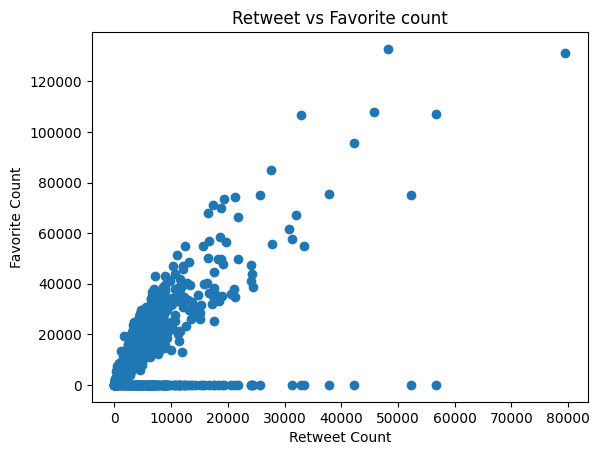

In [29]:
#checking the correlation between retweet count and favorite_count

plt.scatter(data=tweet_data, x='retweet_count', y='favorite_count')
plt.title('Retweet vs Favorite count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')

The plot shows some data points where the retweet count is high, but the favorite count is significantly low. 

In [30]:
tweet_data.query('retweet_count > favorite_count')

,tweet_id,retweet_count,favorite_count
31,886054160059072513,108,0
35,885311592912609280,19297,0
67,879130579576475649,7181,0
72,878404777348136964,1349,0
73,878316110768087041,6965,0
...,...,...,...
1021,746521445350707200,1110,0
1041,743835915802583040,2387,0
1240,711998809858043904,138,0
2257,667550904950915073,37,0


In [31]:
# checking if all of these columns have favorite count as 0 or not. 

tweet_data.query('retweet_count > favorite_count & favorite_count == 0')

,tweet_id,retweet_count,favorite_count
31,886054160059072513,108,0
35,885311592912609280,19297,0
67,879130579576475649,7181,0
72,878404777348136964,1349,0
73,878316110768087041,6965,0
...,...,...,...
1021,746521445350707200,1110,0
1041,743835915802583040,2387,0
1240,711998809858043904,138,0
2257,667550904950915073,37,0


In [32]:
# checking for these tweets in the archive. 

zero_fav_count = tweet_data.query('retweet_count > favorite_count')['tweet_id']

twitter_archive.query('tweet_id in @zero_fav_count')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,NaN,NaN,NaN,NaN,NaN
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,NaN,NaN,NaN,NaN
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,NaN,NaN,NaN,NaN
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,NaN,NaN,NaN,NaN
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,NaN,NaN,NaN,NaN
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,NaN,NaN,NaN,NaN,NaN
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,NaN,NaN,NaN,NaN,NaN
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,NaN,NaN,NaN,NaN,NaN


In [33]:
# checking if all of these are related to retweets. 

twitter_archive.query('tweet_id in @zero_fav_count')['retweeted_status_id'].count()

np.int64(179)

### Quality issues
1. The dog stage column (twitter_archive) should have categorical data type.

2. timestamp (twitter_archive) should have datetime data type. 

3. The twitter_archive dataframe has retweets.

4. The values in predictions (tweet_images) have incosistency in capitalization. 

5. Not all images have a dog-related prediction. 

6. There are duplicated image urls, related to retweets. 

7. One row has a total confidence of greater than 1 in tweet_images. 

8. Many rows have 0 as the favorite count, related to retweets in tweet_data. 

### Tidiness issues
1. The dog stages (doggo, pupper, puppo, floofer) should be a single column in twitter_archive. 

2. The predictions should be a single column (p1, p2, p2) in tweet_images. 

3. As the information about all tweets are spread across three different dataframes, all cleaned data frames should be merged into one master dataset. 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [130]:
# Make copies of original pieces of data

archive_clean = twitter_archive.copy()
preds_clean = tweet_images.copy()
tweet_data_clean = tweet_data.copy()


### Issue #1: The twitter_archive dataframe has retweets.

#### Define:

Remove retweets by dropping rows in archive_clean that have values in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp, and then drop those three columns. 

#### Code

In [131]:
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]


In [132]:
archive_clean.drop(
    ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],
    axis=1, inplace=True
)

#### Test

In [133]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   1495 non-null   object 
 10  doggo                  87 non-null     object 
 11  floofer                10 non-null     object 
 12  pupper                 234 non-null    object 
 13  puppo                  25 non-null     object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


### Issue #2: There are duplicated image urls, related to retweets.

#### Define

Filter out the tweets in preds_clean using the tweet_id present in archive_clean. This should remove all duplicate imgages. 

#### Code

In [134]:
archive_clean_tweets = archive_clean['tweet_id']

In [135]:
preds_clean = preds_clean.query('tweet_id in @archive_clean_tweets')

#### Test

In [136]:
sum(preds_clean.duplicated('jpg_url'))

0

### Issue #3: Not all images have a dog related prediction.

#### Define

Remove the entries where the no prediction is of a dog.

#### Code

In [137]:
preds_clean = preds_clean.query('p1_dog == True | p2_dog == True | p3_dog == True')

#### Test

In [138]:
preds_clean.query('p1_dog == False & p2_dog == False & p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #4: One row has a total confidence of greater than 1 in tweet_images.

#### Define

Remove the rows where (p1_conf + p2_conf + p3_conf) > 1 in preds_clean.

#### Code

In [139]:
preds_clean = preds_clean.query('(p1_conf + p2_conf + p3_conf) <= 1')

#### Test

In [140]:
preds_clean.query('(p1_conf + p2_conf + p3_conf) > 1')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [141]:
# now keeping only the tweets that are common in preds_clean and archive_clean

preds_clean_tweets = preds_clean['tweet_id']
archive_clean = archive_clean.query('tweet_id in @preds_clean_tweets')

In [142]:
len(archive_clean) == len(preds_clean)

True

In [143]:
len(preds_clean)

1686

### Issue #5: Many rows have 0 in the favorite count, related to retweets in the tweet_data.

#### Define

We will perform the left join of archive_clean with tweet_data_clean. As archive_clean doesn't contain any retweets, this will handle the favorite count rows having 0.  

#### Code

In [144]:
archive_clean = archive_clean.merge(tweet_data_clean, how='left', on='tweet_id')

#### Test

In [145]:
archive_clean.query('favorite_count == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count


### Issue #6: timestamp (twitter_archive) should have datetime data type. 

#### Define

Change the data type of the timestamp column in archive_clean to datetime. 

#### Code

In [146]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [147]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1686 non-null   int64              
 1   in_reply_to_status_id  20 non-null     float64            
 2   in_reply_to_user_id    20 non-null     float64            
 3   timestamp              1686 non-null   datetime64[ns, UTC]
 4   source                 1686 non-null   object             
 5   text                   1686 non-null   object             
 6   expanded_urls          1686 non-null   object             
 7   rating_numerator       1686 non-null   int64              
 8   rating_denominator     1686 non-null   int64              
 9   name                   1267 non-null   object             
 10  doggo                  64 non-null     object             
 11  floofer                8 non-null      object           

### Issue #7: The values in predictions (tweet_images) have incosistency in capitalization.

#### Define

Change all the characters in predictions to lowercase in preds_clean

#### Code

In [148]:
preds_clean['p1'] = preds_clean['p1'].str.lower()
preds_clean['p2'] = preds_clean['p2'].str.lower()
preds_clean['p3'] = preds_clean['p3'].str.lower()

#### Test

In [149]:
preds_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Issue #8: The dog stage (doggo, floofer, pupper, puppo) should be a single column in twitter_archive.

#### Define

Using the melt() function on columns doggo, floofer, pupper and puppo to create one single column with the dog_stage. Drop the initial columns. 

#### Code

In [150]:
dog_stage = pd.melt(
    archive_clean,
    id_vars='tweet_id',
    value_vars=['doggo', 'floofer', 'pupper', 'puppo'],
    var_name='dog_stage',
    value_name='dog_stage_text'
)

dog_stage.head()

,tweet_id,dog_stage,dog_stage_text
0,892177421306343426,doggo,NaN
1,891815181378084864,doggo,NaN
2,891689557279858688,doggo,NaN
3,891327558926688256,doggo,NaN
4,891087950875897856,doggo,NaN


In [151]:
archive_clean = archive_clean.merge(dog_stage, how='inner', on='tweet_id')

In [152]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,dog_stage,dog_stage_text
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,6514,33819,doggo,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,6514,33819,floofer,NaN
2,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,6514,33819,pupper,NaN
3,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,6514,33819,puppo,NaN
4,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,4328,25461,doggo,NaN


In [153]:
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [154]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage,dog_stage_text
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,doggo,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,floofer,NaN
2,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,pupper,NaN
3,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,puppo,NaN
4,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4328,25461,doggo,NaN


### Issue #9: The dog_stage column should have categorical data type. 

#### Define

Convert the dog_stage and dog_stage_text columns to categorical data type.

#### Code

In [155]:
archive_clean['dog_stage'] = archive_clean['dog_stage'].astype('category')
archive_clean['dog_stage_text'] = archive_clean['dog_stage_text'].astype('category')

#### Test

In [156]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6744 entries, 0 to 6743
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               6744 non-null   int64              
 1   in_reply_to_status_id  80 non-null     float64            
 2   in_reply_to_user_id    80 non-null     float64            
 3   timestamp              6744 non-null   datetime64[ns, UTC]
 4   source                 6744 non-null   object             
 5   text                   6744 non-null   object             
 6   expanded_urls          6744 non-null   object             
 7   rating_numerator       6744 non-null   int64              
 8   rating_denominator     6744 non-null   int64              
 9   name                   5068 non-null   object             
 10  retweet_count          6744 non-null   int64              
 11  favorite_count         6744 non-null   int64            

### Issue #10: The predictions should be a single column in tweet images.

#### Define

Using melt, create single columns for prediction, prediction conf, and predictions dog. 

#### Code

In [157]:
def preds_melt(p1, p2, p3, value_name):

    df = preds_clean[['tweet_id', 'jpg_url', 'img_num', p1, p2, p3]]

    df.rename(columns={p1: 1, p2: 2, p3: 3}, inplace=True)

    df = pd.melt(
        df,
        id_vars=['tweet_id', 'jpg_url', 'img_num'],
        value_vars=[1, 2, 3],
        var_name = 'pred_num',
        value_name = value_name
    )

    return df

In [158]:
pred_names = preds_melt('p1', 'p2', 'p3', 'prediction')

C:\Users\aayus\AppData\Local\Temp\ipykernel_14616\2704857815.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={p1: 1, p2: 2, p3: 3}, inplace=True)


In [159]:
pred_conf = preds_melt('p1_conf', 'p2_conf', 'p3_conf', 'confidence')

C:\Users\aayus\AppData\Local\Temp\ipykernel_14616\2704857815.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={p1: 1, p2: 2, p3: 3}, inplace=True)


In [160]:
pred_dogs = preds_melt('p1_dog', 'p2_dog', 'p3_dog', 'dog_status')

C:\Users\aayus\AppData\Local\Temp\ipykernel_14616\2704857815.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={p1: 1, p2: 2, p3: 3}, inplace=True)


In [161]:
preds_clean = pred_names.merge(
    pred_conf,
    how='inner',
    on=['tweet_id', 'jpg_url', 'img_num', 'pred_num']
)

In [162]:
preds_clean = preds_clean.merge(
    pred_dogs,
    how='inner',
    on=['tweet_id', 'jpg_url', 'img_num', 'pred_num']
)

#### Test

In [163]:
preds_clean.head()

,tweet_id,jpg_url,img_num,pred_num,prediction,confidence,dog_status
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,german_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,1,miniature_pinscher,0.560311,True


In [164]:
preds_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5058 entries, 0 to 5057
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    5058 non-null   int64  
 1   jpg_url     5058 non-null   object 
 2   img_num     5058 non-null   int64  
 3   pred_num    5058 non-null   object 
 4   prediction  5058 non-null   object 
 5   confidence  5058 non-null   float64
 6   dog_status  5058 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 242.2+ KB


### Issue #11: As the information about all tweets are spread across three different dataframes, all cleaned data frames should be merged into one master dataset.

#### Define: 

Combine all dataframes into a single dataframe to consolidate all data into one. 

#### Code:

In [165]:
archive_clean = archive_clean.merge(
    preds_clean,
    on='tweet_id',
    how='inner'
)

#### Test:

In [166]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage,dog_stage_text,jpg_url,img_num,pred_num,prediction,confidence,dog_status
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,doggo,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1,chihuahua,0.323581,True
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,doggo,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,2,pekinese,0.090647,True
2,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,doggo,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,3,papillon,0.068957,True
3,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,floofer,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1,chihuahua,0.323581,True
4,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,floofer,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,2,pekinese,0.090647,True


In [167]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20232 entries, 0 to 20231
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               20232 non-null  int64              
 1   in_reply_to_status_id  240 non-null    float64            
 2   in_reply_to_user_id    240 non-null    float64            
 3   timestamp              20232 non-null  datetime64[ns, UTC]
 4   source                 20232 non-null  object             
 5   text                   20232 non-null  object             
 6   expanded_urls          20232 non-null  object             
 7   rating_numerator       20232 non-null  int64              
 8   rating_denominator     20232 non-null  int64              
 9   name                   15204 non-null  object             
 10  retweet_count          20232 non-null  int64              
 11  favorite_count         20232 non-null  int64          

## Storing Data
Save gathered, assessed, and cleaned master dataset to 2 CSV files named "twitter_archive.csv" and "image_predictions.csv".

In [168]:
archive_clean.to_csv('twitter_archive.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Tweet counts based on Months.

In [120]:
month_count = archive_clean.groupby(archive_clean['timestamp'].dt.to_period('M'))['tweet_id'].count()

C:\Users\aayus\AppData\Local\Temp\ipykernel_14616\3940498827.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  month_count = archive_clean.groupby(archive_clean['timestamp'].dt.to_period('M'))['tweet_id'].count()


Text(0, 0.5, 'Count')

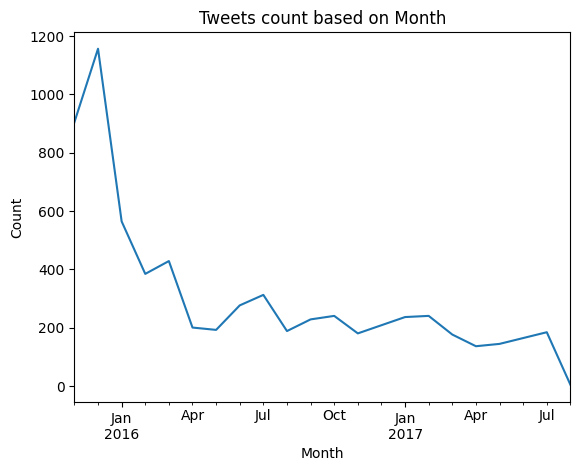

In [121]:
month_count.plot()
plt.title('Tweets count based on Month')
plt.xlabel('Month')
plt.ylabel('Count')

The number of tweets by the We Rate dogs account peeked in Dec 2015.

### Most popular dog breeds based on number of tweets

In [122]:
pop_dog = preds_clean.query('dog_status == True')
pop_dog = pop_dog.groupby('tweet_id', as_index=False)['confidence'].max()

In [123]:
pop_dog = preds_clean.merge(
    pop_dog,
    how='inner',
    on=['tweet_id', 'confidence']
)

Text(0.5, 0, 'Breeds')

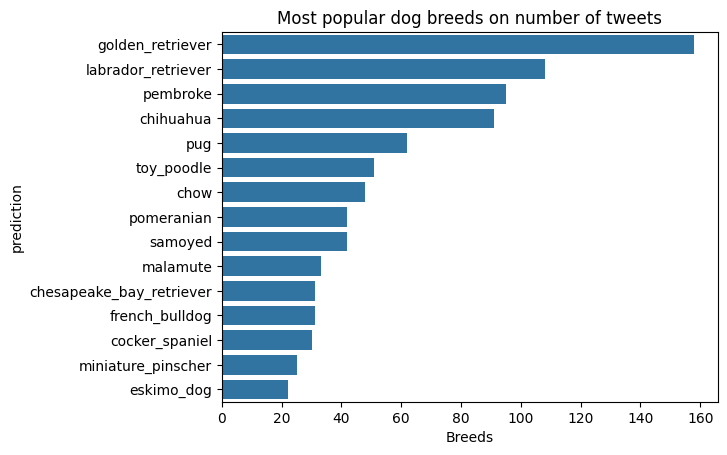

In [124]:
dog_ranking = pop_dog['prediction'].value_counts().head(15)
sns.countplot(data=pop_dog, y='prediction', order=dog_ranking.index)
plt.title('Most popular dog breeds on number of tweets')
plt.xlabel('Number of tweets')
plt.xlabel('Breeds')

The most popular dog by the number of tweets is golder retriever.

### Dog ratings for top 15 breeds by number of tweets

In [125]:
archive_clean['Rating'] = archive_clean['rating_numerator'] / archive_clean['rating_denominator']

In [126]:
rating_df = archive_clean.merge(
    pop_dog,
    how='inner',
    on='tweet_id'
)

In [127]:
rating_counts = rating_df.groupby('prediction')['tweet_id'].count().sort_values(ascending=False).head(15)
rating_breeds = rating_df.merge(
    rating_counts,
    how='inner',
    on='prediction'
)

In [128]:
grouped_rating = rating_breeds.groupby('prediction')['Rating'].mean().sort_values(ascending=False)

Text(0.5, 1.0, 'Avg. Dog Rating vs Breed')

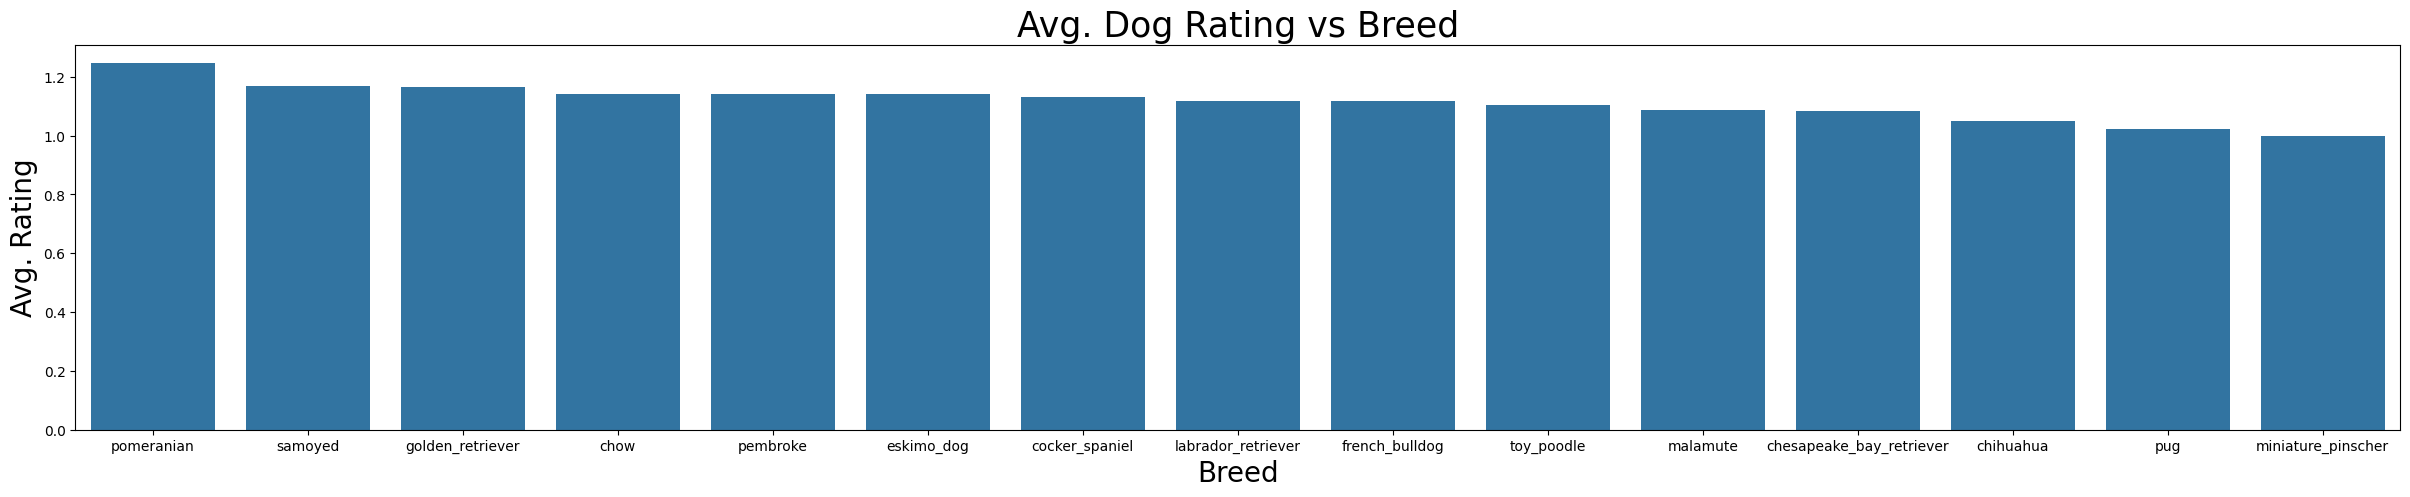

In [129]:
fig, ax = plt.subplots(figsize = (30,5))
sns.barplot(data=grouped_rating, ax=ax)
plt.xlabel('Breed', fontsize=20)
plt.ylabel('Avg. Rating', fontsize=20)
plt.title('Avg. Dog Rating vs Breed', fontsize=25)

Pomerians are the highest rated dogs, among the top 15 most tweeted dog breeds. 

### Insights:
1. The number of tweets by the We Rate Dogs account peeked in Dec 2015.

2. The Golden Retriever are the most tweeted about dogs, by number of tweet counts. 

3. Pomerians are the highest rated dogs, among the top 15 most tweeted dog breeds. 